<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Chapter%2007-2%20-%20%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
키워드 = [심층 신경망, 렐루 함수, 옵티마이저]
- 심층 신경망: 2개 이상의 층을 포함한 신경망이다.
               종종 다층 인공 신경망, 심층 신경망, 딥러닝을 같은 의미로 사용한다.
- 렐루 함수: 이미지 분류 모델의 은닉층에 많이 사용되는 활성화 함수이다.
             시그모이드 함수는 층이 많을수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워진다.
             렐루 함수는 이런 문제가 없으며 계산도 간단하다.
- 옵티마이저: 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법을 말한다.
              케라스에는 다양한 경사 하강법 알고리즘이 구현되어 있다.
              대표적으로 SGD, 네스테로프 모멘텀, RMSprop, Adam 등이 있다.

핵심 패키지 및 함수: [add(), summary(), SGD, Adagrad, RMSprop, Adam]
- add(): 케라스 모델에 층을 추가하는 메서드이다.
         이 메서드는 keras.layers 패키지 아래에 있는 층의 객체를 입력받아 신경망 모델에 추가한다.
         add() 메서드를 호출하여 전달한 순서대로 층이 차례대로 늘어난다.
- summary(): 케라스 모델의 정보를 출력하는 메서드이다. (pandas의 info()와 같은 기능)
             모델에 추가된 층의 종류와 순서, 모델 파라미터 개수를 출력한다.
             층을 만들 때 name 매개변수로 이름을 지정하면 summary() 메서드 출력에서 구분하기 쉽다.
- SGD: 기본 경사 하강법 옵티마이저 클래스이다.
       learnin_rate 매개변수로 학습률을 지정하며 기본값은 0.01이다.
       momentum 매개변수에 0 이상의 값을 지정하면 모멘텀 최적화를 수행한다.
       nesterov 매개변수를 True로 지정하면 네스테로프 모멘텀 최적화를 수행한다.
- Adagrad: Adagrad 옵티마이저 클래스이다.
           learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001이다.
           Adagrad는 그레이디언트 제곱을 누적하여 학습률을 나눈다.
           initial_accumulator_value 매개변수에서 누적 초깃값을 지정할 수 있으며 기본값은 0.1이다.
- RMSprop: RMSprop 옵티마이저 클래스이다.
           learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001이다.
           Adagrad처럼 그레이디언트 제곱으로 학습률을 나누지만 최근의 그레이디언트를 사용하기 위해 지수 감소를 사용한다.
           rho 매개변수에서 감소 비율을 지정하며 기본값은 0.9이다.
- Adam: Adam 옵티마이저 클래스이다.
        learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001이다.
        모멘텀 최적화에 있는 그레이디언트 지수 감소 평균을 조절하기 위해 beta_1 매개변수가 있으며 기본값은 0.9이다.
        RMSprop에 있는 그레이디언트 제곱의 지수 감소 평균을 조절하기 위해 beta_2 매개변수가 있으며 기본값은 0.999이다.


이전 장에서 성공적으로 로지스틱 회귀보다 성능이 좋은 인공 신경망을 만들었다.
이제 이 인공 신경망의 성능을 더욱 높여보자.

다시 케라스 API를 사용해 패션 MNIST 데이터셋을 불러오겠다.
'''

'\n이전 장에서 성공적으로 로지스틱 회귀보다 성능이 좋은 인공 신경망을 만들었다.\n이제 이 인공 신경망의 성능을 더욱 높여보자.\n\n다시 케라스 API를 사용해 패션 MNIST 데이터셋을 불러오겠다.\n'

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
# 데이터셋 로드
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
'''
그다음 이미지의 픽셀값을 0~255 범위에서 0~1 사이로 변환하고,
28 x 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼칩니다.
마지막으로 사이킷런의 train_test_split() 함수로 훈련 세트와 검증 세트로 나눈다.
이 과정까지는 07-1 장에서 했던 것과 동일하다.
'''

'\n그다음 이미지의 픽셀값을 0~255 범위에서 0~1 사이로 변환하고,\n28 x 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼칩니다.\n마지막으로 사이킷런의 train_test_split() 함수로 훈련 세트와 검증 세트로 나눈다.\n이 과정까지는 07-1 장에서 했던 것과 동일하다.\n'

In [ ]:
# 이미지 1차원 배열로 변환 및 데이터 세트 나누기
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0 # 입력 데이터 정규화 (모든 픽셀값을 0~1 사이로 변환)
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

<center>
<img src='https://velog.velcdn.com/images/simon919/post/48fbc91e-edd2-4d10-acff-684f670dff83/image.png'width='780'
height = '600' /><br>
</center>

<!-- source: https://velog.io/@simon919/7-2.-%EC%8B%AC%EC%B8%B5-%EC%8B%A0%EA%B2%BD%EB%A7%9D -->

In [ ]:
'''
example)
간단한 심층 신경망 모델을 예로 들어보겠습니다.

입력층: 이미지 데이터 (픽셀 값)
은닉층: 100개의 뉴런, ReLU 활성화 함수 사용
출력층: 10개의 뉴런 (10개의 클래스), softmax 활성화 함수 사용
이 모델에서 데이터는 다음과 같은 과정을 거칩니다.

입력 데이터가 은닉층에 입력됩니다.
은닉층의 각 뉴런은 입력 데이터에 가중치를 곱하고 편향을 더한 후, ReLU 활성화 함수를 적용하여 출력값을 생성합니다.
은닉층의 출력값은 출력층에 입력됩니다.
출력층의 각 뉴런은 은닉층의 출력값에 가중치를 곱하고 편향을 더한 후,
 softmax 활성화 함수를 적용하여 최종 예측 값 (각 클래스에 속할 확률)을 생성합니다.
 '''

'\nexample)\n간단한 심층 신경망 모델을 예로 들어보겠습니다.\n\n입력층: 이미지 데이터 (픽셀 값)\n은닉층: 100개의 뉴런, ReLU 활성화 함수 사용\n출력층: 10개의 뉴런 (10개의 클래스), softmax 활성화 함수 사용\n이 모델에서 데이터는 다음과 같은 과정을 거칩니다.\n\n입력 데이터가 은닉층에 입력됩니다.\n은닉층의 각 뉴런은 입력 데이터에 가중치를 곱하고 편향을 더한 후, ReLU 활성화 함수를 적용하여 출력값을 생성합니다.\n은닉층의 출력값은 출력층에 입력됩니다.\n출력층의 각 뉴런은 은닉층의 출력값에 가중치를 곱하고 편향을 더한 후,\n softmax 활성화 함수를 적용하여 최종 예측 값 (각 클래스에 속할 확률)을 생성합니다.\n '

In [ ]:
'''
이전 장에서 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된 것이다.
이렇게 입력층과 출력층 사이에 있는 모든 층을 "은닉층(hidden layer)"이라 부른다.

은닉층에는 주황색 원으로 활성화 함수가 표시되어 있다.
활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수이다.
이전 장에서 출력층에 적용했던 소프트맥스도 활성화 함수이다.
출력층에 적용하는 활성화 함수는 종류가 제한되어 있는데,
이진 분류일 경우 시그모이드 함수를 사용하고 다중 분류일 경우 소프트맥스 함수를 사용한다.
이에 비해 은닉층의 활성화 함수는 비교적 자유롭다.
대표적으로 시그모이드 함수와 잠시 후에 볼 "렐루(ReLU)" 함수 등을 사용한다.

회귀를 위한 신경망의 출력층에서는 어떤 활성화 함수를 사용할까? (분류는 시그모이드 or 소프트맥스)
분류 문제는 클레스에 대한 확률을 출력하기 위해 활성화 함수를 사용한다.
회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없다.
즉 출력층의 선형 방정식의 계산을 그대로 출력한다.
이렇게 하려면 Dense 층의 activatin 매개변수에 아무런 값을 지정하지 않는다.

그런데 은닉층에 왜 활성화 함수를 적용할까?
아래에 있는 2개의 선형 방정식을 생각해 보자.
a * 4 + 2 = b
                --> a * 12 + 1 = c
b  * 3 - 5 = c

왼쪽의 첫 번째 식에서 계산된 b가 두 번째 식에서 c를 계산하기 위해 쓰인다.
하지만 두 번째 식에 첫 번째 식을 대입하면 오른쪽처럼 하나로 합쳐질 수 있다.
이렇게 되면 b는 사라지고, b가 하는 일이 없는 셈이다.

신경망도 마찬가지이다.
은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈이다.
선형 계산을 적당하게 비선형적으로 비틀어 주어야 한다.
그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.
마치 다음과 같다.
a * 4 + 2 = b
log(b) = k
k * 3 - 5 = c

다른 책에서 보니 인공 신경망 그림에 활성화 함수가 없던데?
인공 신경망을 그림으로 나타낼 때 활성화 함수를 생략하는 경우가 많은데
이는 절편과 마찬가지로 번거로움을 피하기 위해 활성화 함수를 별개의 층으로 생각하지 않고
층에 포함되어 있다고 간주하기 때문이다.
그림에서 보이지는 않지만 모든 신경망의 은닉층에는 항상 활성화 함수가 있다!

많이 사용하는 활성화 함수 중 하나는 4장에서 배운 시그모이드 함수이다.
기억을 되살리기 위해 다시 한번 살펴보겠다.
σ(x) = 1 / (1 + exp^-z)

이 함수는 뉴런의 출력 z값을 0과 1사이로 압축한다.
그럼 시그모이드 활성화 함수를 사용한 은닉층과
소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들어 보겠다.
이전 장에서 언급했듯이 케라스에서 신경망의 첫 번째 층은 input_shape 매개변수로 입력의 크기를 꼭 지정해 주어야 한다.
'''

'\n이전 장에서 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된 것이다.\n이렇게 입력층과 출력층 사이에 있는 모든 층을 "은닉층(hidden layer)"이라 부른다.\n\n은닉층에는 주황색 원으로 활성화 함수가 표시되어 있다.\n활성화 함수는 신경망 층의 선혀 방정식의 계산 값 적용하는 함수이다.\n이전 장에서 출력층에 적용했던 소프트맥스도 활성화 함수이다.\n출력층에 적용하는 활성화 함수는 종류가 제한되어 있는데,\n이진 분류일 경우 시그모이드 함수를 사용하고 다중 분류일 경우 소프트맥스 함수를 사용한다.\n이에 비해 은닉층의 활성화 함수는 비교적 자유롭다.\n대표적으로 시그모이드 함수와 잠시 후에 볼 "렐루(ReLU)" 함수 등을 사용한다.\n\n회귀를 위한 신경망의 출력층에서는 어떤 활성화 함수를 사용할까? (분류는 시그모이드 or 소프트맥스)\n분류 문제는 클레스에 대한 확률을 출력하기 위해 활성화 함수를 사용한다.\n회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없다.\n즉 출력층의 선형 방정식의 계산을 그대로 출력한다.\n이렇게 하려면 Dense 층의 activatin 매개변수에 아무런 값을 지정하지 않는다.\n\n그런데 은닉층에 왜 활성화 함수를 적용할까?\n아래에 있는 2개의 선형 방정식을 생각해 보자.\na * 4 + 2 = b \n                --> a * 12 + 1 = c\nb  * 3 - 5 = c\n\n왼쪽의 첫 번째 식에서 계산된 b가 두 번째 식에서 c를 계산하기 위해 쓰인다.\n하지만 두 번째 식에 첫 번째 식을 대입하면 오른쪽처럼 하나로 합쳐질 수 있다.\n이렇게 되면 b는 사라지고, b가 하는 일이 없는 셈이다.\n\n신경망도 마찬가지이다.\n은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈이다.\n선형 계산을 적당하게 비선형적으로 비틀어 주어야 한다.\n그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.\n마치 다음과 같다.\

In [ ]:
# 출력층을 Dense 클래스로 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )) # Dense의 첫 번째 인자는 뉴런의 개수임을 기억하자
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
'''
dense1이 은닉층이고 100개의 뉴런을 가진 밀집층이다.
활성화 함수를 'sigmoid'라고 지정했고 input_shape 매개변수에서 입력의 크기를 (784, )로 지정했다.
은닉층의 뉴런 개수를 정하는 데는 특별한 기준이 없다.
몇 개의 뉴런을 두어야 할지 판단하기 위해서는 상당한 경험이 필요하다.

여기에 한 가지 제약 사항이 있다면 적어도 출력층의 뉴런보다는 많게 만들어야 한다. (중요)
클래스 10개에 대한 확률을 에측해야 하는데 이전 은닉층의 뉴런이 10개보다 적다면 부족한 정보가 전달된 것이다.

그다음 dense2는 출력층이다.
10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트맥스 함수로 지정했다.

이제 앞에서 만든 dense1과 dense2 객체를 Sequential 클래스에 추가하여 "심층 신경망(deep neural network, DNN)"을 만들어 보자.
'''

'\ndense1이 은닉층이고 100개의 뉴런을 가진 밀집층이다.\n활성화 함수를 \'sigmoid\'라고 지정했고 input_shape 매개변수에서 입력의 크기를 (784, )로 지정했다.\n은닉층의 뉴런 개수를 정하는 데는 특별한 기준이 없다.\n몇 개의 뉴런을 두어야 할지 판단하기 위해서는 상당한 경험이 필요하다.\n\n여기에 한 가지 제약 사항이 있다면 적어도 출력층의 뉴런보다는 많게 만들어야 한다.\n클래스 10개에 대한 확률을 에측해야 하는데 이전 은닉층의 뉴런이 10개보다 적다면 부족한 정보가 전달된 것이다.\n\n그다음 dense2는 출력층이다.\n10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트맥스 함수로 지정했다.\n\n이제 앞에서 만든 dense1과 dense2 객체를 Sequential 클래스에 추가하여 "심층 신경망(deep neural network, DNN)"을 만들어 보자.\n'

In [ ]:
# Sequential 클래스에 dense 객체 추가 (DNN 모델 생성)
model = keras.Sequential([dense1, dense2])

In [ ]:
'''
Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 이와 같이 dense1과 dense2를 리스트로 만들어 전달한다.
여기서 주의할 것은 출력층을 가장 마지막에 두어야 한다는 것이다.
이 리스트는 가장 처음 등장하는 은닉층에서 마지막 출력층의 순서로 나열해야 한다.

인공 신경망의 강력한 성능은 바로 이렇게 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력에서 나온다.
앞 장들에서 배운 선형 회귀, 로지스틱 회귀, 결정 트리 등 다른 머신러닝 알고리즘들과 대조된다.
물론 2개 이상의 층을 추가할 수도 있다.
다음 장에서 더 복잡한 모델을 만들어 보겠다.
'''

'\nSequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 이와 같이 dense1과 dense2를 리스트로 만들어 전달한다.\n여기서 주의할 것은 출력층을 가장 마지막에 두어야 한다는 것이다.\n이 리스트는 가장 처음 등장하는 은닉층에서 마지막 출력층의 순서로 나열해야 한다.\n\n인공 신경망의 강력한 성능은 바로 이렇게 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력에서 나온다.\n앞 장들에서 배운 선형 회귀, 로지스틱 회귀, 결정 트리 등 다른 머신러닝 알고리즘들과 대조된다.\n물론 2개 이상의 층을 추가할 수도 있다.\n다음 장에서 더 복잡한 모델을 만들어 보겠다.\n'

In [ ]:
# 층에 대한 정보 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
맨 첫 줄에 모델의 이름이 나오고, 그다음 이 모델에 들어 있는 층이 순서대로 나열된다.
이 순서는 맨 처음 추가한 은닉층에서 출력층의 순서대로 나열된다.

층마다 층 이름, 클래스, 출력  크기, 모델 파라미터 개수가 출력된다.
층을 만들 때 name 매개변수로 이름을 지정할 수 있다.
층 이름을 지정하지 않으면 케라스가 자동으로 'dense'라고 이름을 붙인다.

출력 크기를 보면 (None, 100)이다.
첫 번째 차원은 샘플의 개수를 나타내는데, 아직 정의되어 있지 않아서 None이다.
왜 그럴까?
케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고
잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행한다. 바로 미니배치 경사 하강법을 사용하는 것이다.

케라스의 기본  미니배치 크기는 32개이다.
이 값은 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있다.
따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정한다.
이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원이라고 부른다.

두 번째 100은 쉽다.
은닉층의 뉴런 개수를 100개로 두었으니 100개의 출력이 나온다.
즉 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축되었다.

마지막으로 모델 파라미터 개수가 출력된다.
이 층은 Dense 층이므로 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있다.
그리고 뉴런마다 1개의 절편이 있다.

두 번째 층의 출력 크기는 (None, 10)이다.
배치 차원은 동일하게 None이고 출력 뉴런 개수가 10개이기 때문이다.
이 층의 모델 파라미터 개수는 몇 개일까?
100개의 은닉층 뉴런과 10개의 출력층 뉴런이 모두 연결되고
출력층의 뉴런마다 하나의 절편이 있기 때문에 총 1,010개의 모델 파라미터가 있다.

summary() 메서드의 마지막에는 총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79,510으로 나온다.
은닉층과 출력층의 파라미터 개수를 합친 값이다.
그 아래 훈련되지 않는 파라미터(Non-trainable params)는 0으로 나온다.
간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있다.
이런 층의 파라미터 개수가 여기에 나타난다.

모델을 훈련하기 전에 Sequential 클래스에 층을 추가하는 다른 방법을 알아보겠다.
앞에서는 Dense 클래스의 객체 dense1, dense2를 만들어 Sequential 클래스에 전달했다.
이 두 객체를 따로 저장하여 쓸 일이 없기 때문에 다음처럼 Seqeuntial 클래스의 생성자 안에서
바로 Dense 클래스의 객체를 만드는 경우가 많다.
'''

"\n맨 첫 줄에 모델의 이름이 나오고, 그다음 이 모델에 들어 있는 층이 순서대로 나열된다.\n이 순서는 맨 처음 추가한 은닉층에서 출력층의 순서대로 나열된다.\n\n층마다 층 이름, 클래스, 출력  크기, 모델 파라미터 개수가 출력된다.\n층을 만들 때 name 매개변수로 이름을 지정할 수 있다. \n층 이름을 지정하지 않으면 케라스가 자동으로 'dense'라고 이름을 붙인다.\n\n출력 크기를 보면 (None, 100)이다.\n첫 번째 차원은 샘플의 개수를 나타내는데, 아직 정의되어 있지 않아서 None이다.\n왜 그럴까?\n케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 \n잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행한다. 바로 미니배치 경사 하강법을 사용하는 것이다.\n\n케라스의 기본  미니배치 크기는 32개이다.\n이 값은 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있다.\n따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정한다.\n이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원이라고 부른다.\n\n두 번째 100은 쉽다.\n은닉층의 뉴런 개수를 100개로 두었으니 100개의 출력이 나온다.\n즉 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축되었다.\n\n마지막으로 모델 파라미터 개수가 출력된다.\n이 층은 Dense 층이므로 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있다.\n그리고 뉴런마다 1개의 절편이 있다.\n\n두 번째 층의 출력 크기는 (None, 10)이다.\n배치 차원은 동일하게 None이고 출력 뉴런 개수가 10개이기 때문이다.\n이 층의 모델 파라미터 개수는 몇 개일까?\n100개의 은닉층 뉴런과 10개의 출력층 뉴런이 모두 연결되고 \n출력층의 뉴런마다 하나의 절편이 있기 때문에 총 1,010개의 모델 파라미터가 있다.\n\nsummary(

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [ ]:
'''
이렇게 작업하면 추가되는 층을 한눈에 쉽게 알아보는 장점이 있다.
이전과 달리 이번에는 Sequential 클래스의 name 매개변수로 모델의 이름을 지정했다.
또 Dense 층의 name 매개변수에 층의 이름을 'hidden'과 'output'으로 각각 지정했다.
모델의 이름과 달리 층의 이름은 반드시 영문이어야 한다.
summary() 메서드의 출력에 이름이 잘 반영되는지 확인해 보자.
'''

"\n이렇게 작업하면 추가되는 층을 한눈에 쉽게 알아보는 장점이 있다.\n이전과 달리 이번에는 Sequential 클래스의 name 매개변수로 모델의 이름을 지정했다.\n또 Dense 층의 name 매개변수에 층의 이름을 'hidden'과 'output'으로 각각 지정했다.\n모델의 이름과 달리 층의 이름은 반드시 영문이어야 한다.\nsummary() 메서드의 출력에 이름이 잘 반영되는지 확인해 보자.\n"

In [ ]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
2개의 Dense 층이 이전과 동일하게 추가되었고 파라미터 개수도 같다.
바뀐 것은 모델 이름과 층 이름이다.
여러 모델과 많은 층을 사용할 때 name 매개변수를 사용하면 구분하기 쉽다.

이 방법이 편리하지만 아주 많은 층을 추가하려면 Sequential 클래스 생성자가 매우 길어질 것이다.
또 조건에 따라 층을 추가할 수도 없다.
Sequential 클래스에서 층을 추가할 때 가장 널리 사용하는 방법은 모델의 add() 메서드이다.

이 방법은 다음처럼 Sequential 클래스의 객체를 만들고 이 객체의 add() 메서드를 호출하여 층을 추가한다.
'''

'\n2개의 Dense 층이 이전과 동일하게 추가되었고 파라미터 개수도 같다.\n바뀐 것은 모델 이름과 층 이름이다.\n여러 모델과 많은 층을 사용할 때 name 매개변수를 사용하면 구분하기 쉽다.\n\n이 방법이 편리하지만 아주 많은 층을 추가하려면 Sequential 클래스 생성자가 매우 길어질 것이다.\n또 조건에 따라 층을 추가할 수도 없다.\nSequential 클래스에서 층을 구가할 때 가장 널리 사용하는 방법은 모델의 add() 메서드이다.\n\n이 방법은 다음처럼 Sequential 클래스의 객체를 만들고 이 객체의 add() 메서드를 호출하여 층을 추가한다.\n'

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

# Dense 클래스의 객체를 따로 변수에 담지 않고 바로 add() 메서드로 전달함

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 본격적인 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 컴파일 단계에서는 옵티마이저, 손실 함수(loss), 평가 지표(metrics) 등을 설정함!

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7525 - loss: 0.7720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8463 - loss: 0.4270
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.3857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8696 - loss: 0.3600
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8759 - loss: 0.3410


In [ ]:
'''
훈련 세트에 대한 성능을 보면 추가된 층이 성능을 향상시켰다는 것을 잘 알 수 있다.
인공 신경망에 몇 개의 층을 추가하더라도 compile() 메서드와 fit() 메서드의 사용법은 동일하다.
이것이 케라스 API의 장점이다.

다음은 이미지 분류 문제에서 높은 성능을 낼 수 있는 활성화 함수에 대해 알아보자.
'''

'\n훈련 세트에 대한 성능을 보면 추가된 층이 성능을 향상시켰다는 것을 잘 알 수 있다.\n인공 신경망에 몇 개의 층을 추가하더라도 compile() 메서드와 fit() 메서드의 사용법은 동일하다.\n이것이 케라스 API의 장점이다.\n\n다음은 이미지 분류 문제에서 높은 성능을 낼 수 있는 활성화 함수에 대해 알아보자.\n'

In [ ]:
'''
초창기 인공 신경망의 은닉층에 많이 사용하는 활성화 함수는 시그모이드 함수였다.
하지만 이 함수에는 단점이 있다.
이 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에
올바른 출력을 만드는데 신속하게 대응하지 못한다.

특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만든다.
이를 개선하기 위해 다른 종류의 활성화 함수가 제안되었다.
바로 "렐루(ReLU)" 함수이다.
렐루 함수는 아주 간단하다.
입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고
음수일 경우에는 0으로 만든다.
밑의 그림을 참고하자.
'''

'\n초창기 인공 신경망의 은닉층에 많이 사용하는 활성화 함수는 시그모이드 함수였다.\n하지만 이 함수에는 단점이 있다. \n이 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에\n올바른 출력을 만드는데 신속하게 대응하지 못한다.\n\n특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만든다.\n이를 개선하기 위해 다른 종류의 활성화 함수가 제안되었다.\n바로 "렐루(ReLU)" 함수이다.\n렐루 함수는 아주 간단하다.\n입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고\n음수일 경우에는 0으로 만든다.\n밑의 그림을 참고하자.\n'

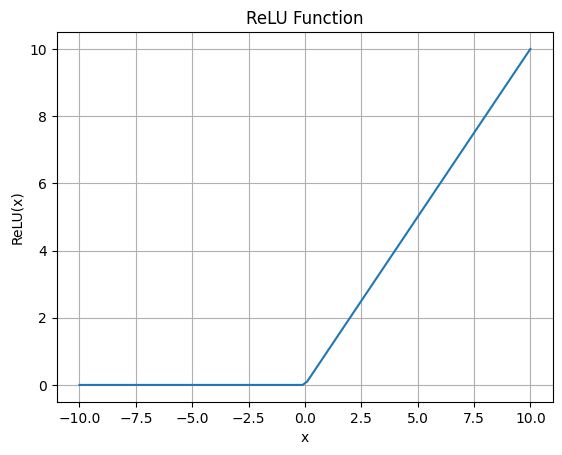

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
  return np.maximum(0, x)

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the ReLU function
y = relu(x)

# Create the plot
plt.plot(x, y)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)  # Add a grid for better visualization

# Display the plot
plt.show()

In [ ]:
'''
렐루 함수는 max(0, z)와 같이 쓸 수 있다.
이 함수는 z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력한다.
렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.
은닉층의 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 케라스에서 제공하는 편리한 층 하나를 더 살펴보자.

패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해
넘파이 배열이 reshape() 메서드를 사용해 1차원으로 펼쳤다.
직접 이렇게 1차원으로 펼쳐도 좋지만 케라스에서는 이를 위한 Flatten 층을 제공한다.

사실 Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다.
입력에 곱해지는 가중치나 절편이 없다.
따라서 인공 신경망의 성능을 위해 기여하는 바는 없다.
하지만 Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라 부른다
Flatten 층은 다음 코드처럼 입력층 바로 뒤에 추가한다.
'''

'\n렐루 함수는 max(0, z)와 같이 쓸 수 있다.\n이 함수는 z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력한다.\n렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.\n은닉층의 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 케라스에서 제공하는 편리한 층 하나를 더 살펴보자.\n\n패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해\n넘파이 배열이 reshape() 메서드를 사용해 1차원으로 펼쳤다.\n직접 이렇게 1차원으로 펼쳐도 좋지만 케라스에서는 이를 위한 Flatten 층을 제공한다.\n\n사실 Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다.\n입력에 곱해지는 가중치나 절편이 없다.\n따라서 인공 신경망의 성능을 위해 기여하는 바는 없다.\n하지만 Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라 부른다\nFlatten 층은 다음 코드처럼 입력층 바로 뒤에 추가한다.\n'

In [ ]:
# Flatten 층 추가
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 왜 이미 데이터셋을 reshape() 함수를 사용해 1차원 배열로 펼쳤는데 또 펼치는 걸까?
# 몇 가지 이점이 있기 때문임
# 1. 데이터 전처리 과정을 모델에 포함시킬 수 있음
# 2. 모델의 구조를 더욱 명확하게 표현할 수 있음
# 3. 다른 종류의 입력 데이터를 처리할 수 있음
# 따라서 Flatten 층으로 데이터를 펼치는 것이 일반적으로 권장됨 (생략해도 성능에 큰 차이가 없음)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
'''
첫 번째 Dense 층에 있던 input_shape 매개변수를 Flatten 층으로 옮겼다.
또 첫 번째 Dense 층의 활성화 함수를 'relu'로 바꾼 것을 눈여겨보자.
하지만 이 신경망을 깊이가 3인 신경망이라고는 부르지 않는다.
Flatten 클래스는 학습하는 층이 아니기 때문이다!
모델의 summary() 메서드를 호출해 보면 이런 점을 더욱 확실히 알 수 있을 것이다.
'''

"\n첫 번째 Dense 층에 있던 input_shape 매개변수를 Flatten 층으로 옮겼다.\n또 첫 번째 Dense 층의 활성화 함수를 'relu'로 바꾼 것을 눈여겨보자.\n하지만 이 신경망을 깊이가 3인 신경망이라고는 부르지 않는다.\nFlatten 클래스는 학습하는 층이 아니기 때문이다!\n모델의 summary() 메서드를 호출해 보면 이런 점을 더욱 확실히 알 수 있을 것이다.\n"

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
첫 번째 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개이다.
케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것이 또 하나의 장점이다.
앞의 출력에서 784개의 입력이 첫 번째 은닉층에 전달된다는 것을 알 수 있는데,
이는 이전에 만들었던 모델에서는 쉽게 눈치채기 어려웠다.
입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학 중 하나이다.

그럼 훈련 데이터를 다시 준비해서 모델을 훈련해 보겠다.
이번 장의 서두에 있던 코드와 동일하지만 reshape() 메서드를 사용하지 않았다.
'''

'\n첫 번째 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개이다.\n케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것이 또 하나의 장점이다.\n앞의 출력에서 784개의 입력이 첫 번째 은닉층에 전달된다는 것을 알 수 있는데,\n이는 이전에 만들었던 모델에서는 쉽게 눈치채기 어려웠다.\n입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학 중 하나이다.\n\n그럼 훈련 데이터를 다시 준비해서 모델을 훈련해 보겠다.\n이번 장의 서두에 있던 코드와 동일하지만 reshape() 메서드를 사용하지 않았다.\n'

In [ ]:
# 데이터셋 준비
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7637 - loss: 0.6723
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8515 - loss: 0.4054
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8676 - loss: 0.3595
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8786 - loss: 0.3344
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8858 - loss: 0.3177


In [ ]:
# 검증 세트 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8671 - loss: 0.3837


[0.3847014605998993, 0.8665000200271606]

In [ ]:
'''
07-1장의 은닉층을 추가하지 않은 경우보다 몇 퍼센트 성능이 향상되었다.
지금까지는 모델을 5번의 에포크 동안 훈련했다.
이보다 더 훈련하지 않을 이유가 없다.
그전에 인공 신경망의 하이퍼파라미터에 대해 잠시 알아보고 이번 장을 마무리할 예정이다.
'''

'\n07-1장의 은닉층을 추가하지 않은 경우보다 몇 퍼센트 성능이 향상되었다.\n지금까지는 모델을 5번의 에포크 동안 훈련했다.\n이보다 더 훈련하지 않을 이유가 없다.\n그전에 인공 신경망의 하이퍼파라미터에 대해 잠시 알아보고 이번 장을 마무리할 예정이다.\n'

## 옵티마이저

In [ ]:
'''
3장에서 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터라고 설명했다.
신경망에는 특히 하이퍼파라미터가 많다.
어떤 하이퍼파라미터가 있는지 먼저 이번 장에서 등장한 것들을 생각해 보자.

이번 장에서는 은닉층을 하나 추가했다.
하지만 여러 개의 은닉층을 추가할 수도 있다.
추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야 할 하이퍼파라미터이다.
그럼 은닉층의 뉴런 개수도 하이퍼파라미터일까?
그렇다. 또 활성화 함수도 선택해야 할 하이퍼파라미터 중 하나이다.
심지어 층의 종류도 하이퍼파라미터이다.
이 장에서는 가장 기본적인 밀집층만 다루지만, 다른 종류의 층을 선택할 수도 있다.

케라스는 기본적으로 미니배치 경사 하강법을 사용하여 미니배치 개수는 32개이다.
fit() 메서드의 batch_size 매개변수에서 이를 조정할 수 있으며 역시 하이퍼파라미터이다.
또한 fit() 메서드의 epochs 매개변수도 하이퍼파라미터이다.
반복 횟수에 따라 다른 모델이 만들어지기 때문이다.

마지막으로 compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했다.
케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다. 이들을 "옵티마이저(optimizer)"라고 부른다.
다른 옵티마이저도 테스트해 보자.
또한 RMSprop의 학습률 또한 조정할 하이퍼파라미터 중 하나이다.

처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업이다.
여기서는 여러 가지 옵티마이저를 테스트해 보겠다.
가장 기본적인 옵티마이저는 확률적 경사 하강법인 SGD이다.
이름이 SGD이지만 1개의 샘플을 뽑아서 훈련하지 않고 앞서 언급한 것처럼 기본적으로 미니배치를 사용한다.

옵티마이저를 간단히 말하자면..
손실 함수는 목적지까지의 거리이고,
옵티마이저는 목적지까지 안내하는 네비게이션이다(도구)!
'''

'\n3장에서 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터라고 설명했다.\n신경망에는 특히 하이퍼파라미터가 많다.\n어떤 하이퍼파라미터가 있는지 먼저 이번 장에서 등장한 것들을 생각해 보자.\n\n이번 장에서는 은닉층을 하나 추가했다.\n하지만 여러 개의 은닉층을 추가할 수도 있다.\n추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야 할 하이퍼파라미터이다.\n그럼 은닉층의 뉴런 개수도 하이퍼파라미터일까? \n그렇다. 또 활성화 함수도 선택해야 할 하이퍼파라미터 중 하나이다.\n심지어 층의 종류도 하이퍼파라미터이다.\n이 장에서는 가장 기본적인 밀집층만 다루지만, 다른 종류의 층을 선택할 수도 있다.\n\n케라스는 기본적으로 미니배치 경사 하강법을 사용하여 미니배치 개수는 32개이다.\nfit() 메서드의 batch_size 매개변수에서 이를 조정할 수 있으며 역시 하이퍼파라미터이다.\n또한 fit() 메서드의 epochs 매개변수도 하이퍼파라미터이다.\n반복 횟수에 따라 다른 모델이 만들어지기 때문이다.\n\n마지막으로 compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했다.\n케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다. 이들을 "옵티마이저(optimizer)"라고 부른다.\n다른 옵티마이저도 테스트해 보자.\n또한 RMSprop의 학습률 또한 조정할 하이퍼파라미터 중 하나이다.\n\n처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업이다.\n여기서는 여러 가지 옵티마이저를 테스트해 보겠다.\n가장 기본적인 옵티마이저는 확률적 경사 하강법인 SGD이다.\n이름이 SGD이지만 1개의 샘플을 뽑아서 훈련하지 않고 앞서 언급한 것처럼 기본적으로 미니배치를 사용한다.\n\n옵티마이저를 간단히 말하자면..\n손실 함수는 목적지까지의 거리이고,\n옵티마이저는 목적지까지 안내하는 네비게이션이다(도구)!\n'

In [ ]:
# SGD 옵티마이저를 사용하려면 compile() 메서드의 optimizer 매개변수를 'sgd'로 지정한다.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 이 옵티마이저는 tensorflow.keras.optimizers 패키지 아래 SGD 클래스로 구현되어 있음
# 'sgd' 문자열은 이 클래스의 기본 설정 매개변수로 생성한 객체와 동일함
# 다음 코드는 위의 코드와 정확히 일치함

In [ ]:
sgd = keras.optimizers.SGD()

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
'''
sgd와 'sgd'의 차이는 무엇인가?
원래 sgd = keras.optimizers.SGD()처럼 SGD 클래스 객체를 만들어 사용해야 하는데,
번거로움을 피하고자 'sgd'라 지정하면 자동으로 SGD 클래스 객체를 만들어 준다.
'''

"\nsgd와 'sgd'의 차이는 무엇인가?\n원래 sgd = keras.optimizers.SGD()처럼 SGD 클래스 객체를 만들어 사용해야 하는데,\n번거로움을 피하고자 'sgd'라 지정하면 자동으로 SGD 클래스 객체를 만들어 준다.\n"

In [ ]:
# SGD 클래스의 학습률 변경 (기본값은 0.01)
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
'''
많이 사용하는 옵티마이저들을 알아보자.

기본 경사 하강법 옵티마이저 = [SGD, 모멘텀, 네스테로프 모멘텀]
적응적 학습률 옵티마이저 = [RMSprop, Adam, Adagrad]

기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공한다.
SGD 클래스의 momentum 매개변수의 기본값은 0이다.
이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트 가속도처럼 사용하는 "모멘텀 최적화(momentum optimization)"을 사용한다.
보통 momentum 매개변수는 0.9 이상을 지정한다.
이전 가중치 업데이트의 "관성"을 이용하여 "local minima"를 벗어날 수 있도록 도움

다음처럼 SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면
"네스테로프 모멘텀 최적화(nesterov momentum optimiation)"(또는 네스테로프 가속 경사)를 사용한다.
모멘텀을 사용할 때, 가중치 업데이트를 미리 적용한 후 기울기를 계산하여 업데이트 방향을 보다 정확하게 예측해줌
'''

'\n많이 사용하는 옵티마이저들을 알아보자.\n\n기본 경사 하강법 옵티마이저 = [SGD, 모멘텀, 네스테로프 모멘텀]\n적응적 학습률 옵티마이저 = [RMSprop, Adam, Adagrad]\n\n기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공한다.\nSGD 클래스의 momentum 매개변수의 기본값은 0이다.\n이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트 가속도처럼 사용하는 "모멘텀 최적화(momentum optimization)"을 사용한다.\n보통 momentum 매개변수는 0.9 이상을 지정한다.\n\n다음처럼 SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 \n"네스테로프 모멘텀 최적화(nesterov momentum optimiation)"(또는 네스테로프 가속 경사)를 사용한다.\n'

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [ ]:
'''
네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다.
대부분의 경우 네스테로프 모멘텀 최적화가 기분 확률적 경사 하강법보다 더 나은 성능을 제공한다.

모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다.
이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높다.
이런 학습률을 "적응적 학습률(adaptive learning rate)"이라고 한다.
이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점이다.

적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop이다.
각각 compile() 메서드의 optimizer 매개변수에 "adgrad"와 "rmsprop"으로 지정할 수 있다.
optimizer 매개변수의 기본값이 바로 'rmsprop'이다.
이 두 옵티마이저의 매개변수를 바꾸고 싶다면 SGD와 같이 Adagrad와 RMSprop 클래스 객체를 만들어 사용하면 된다.
'''

'\n네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다.\n대부분의 경우 네스테로프 모멘텀 최적화가 기분 확률적 경사 하강법보다 더 나은 성능을 제공한다.\n\n모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다.\n이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높다.\n이런 학습률을 "적응적 학습률(adaptive learning rate)"이라고 한다.\n이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점이다.\n\n적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop이다.\n각각 compile() 메서드의 optimizer 매개변수에 "adgrad"와 "rmsprop"으로 지정할 수 있다.\noptimizer 매개변수의 기본값이 바로 \'rmsprop\'이다.\n이 두 옵티마이저의 매개변수를 바꾸고 싶다면 SGD와 같이 Adagrad와 RMSprop 클래스 객체를 만들어 사용하면 된다.\n'

In [ ]:
adagrad = keras.optimizers.Adagrad()

model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rmsprop = keras.optimizers.RMSprop()

model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
'''
모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다. (모르겠으면 Adam 쓰라는 말이 있을 정도)
Adam은 RMSprop과 함께 맨처음 시도해 볼 수 있는 좋은 알고리즘이다.
Adam 클래스도 keras.optimizers 패키지 아래에 있다.
적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 0.001을 사용한다.

여기에서는 Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델을 훈련해 보겠다.
먼저 모델을 다시 생성하자.
'''

'\n모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다. (모르겠으면 Adam 쓰라는 말이 있을 정도)\nAdam은 RMSprop과 함께 맨처음 시도해 볼 수 있는 좋은 알고리즘이다.\nAdam 클래스도 keras.optimizers 패키지 아래에 있다.\n적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 0.001을 사용한다.\n\n여기에서는 Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델을 훈련해 보겠다.\n먼저 모델을 다시 생성하자.\n'

In [ ]:
# 모델 재생성
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile() 메서드의 optimizer로 adam 사용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7691 - loss: 0.6706
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8515 - loss: 0.4134
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8691 - loss: 0.3618
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8793 - loss: 0.3302
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8873 - loss: 0.3088


In [ ]:
# 검증 세트 성능 확인
model.evaluate(val_scaled, val_target)

# 기본 RMSprop보다 조금 더 나은 성능을 내는 것을 확인할 수 있음!

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.3506


[0.35239022970199585, 0.8725833296775818]